In [3]:
import matplotlib.pyplot as plt

In [1]:
%run voronoi.py

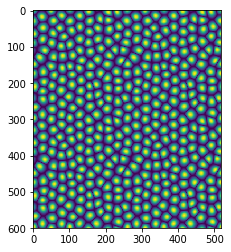

In [4]:
plt.imshow(np.tile(voronoiTriangular(300, 10, 0.12, fill = True),(2, 2)))

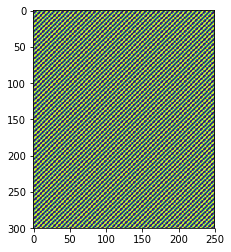

In [6]:
x = np.arange(300) 
# Shape: h
y = np.arange(250) 
# Shapes: (w, h)
xv, yv = np.meshgrid(x, y, indexing = "ij")
plt.imshow(np.sin(xv + yv))

In [7]:
xv.shape

(300, 250)

In [30]:
def fill_img(self, size, center = None, mode = "RGB"):
    h, w = size

    if center is None:
        center = np.array([0.,0.])

    img = np.full((h, w), 1.)

    # We create a coordinate array
    # Shape: w
    x = np.arange(w) + 0.5 - center[0]
    # Shape: h
    y = np.arange(h) + 0.5 - center[1]
    # Shapes: (w, h)
    xv, yv = np.meshgrid(x, y)

    # coordinate array
    # Shape: (w, h, 2)
    coords = np.stack((xv, yv), axis = 2)

    # Constructing masks for every cell

    for cell in self.cells:

        cell.mask = np.full_like(img, 1.)
        cell.dists = []

        for edge in cell.edges:

            # Determining origin and inward-pointing normal of edge
            edge.origin = np.array(edge.origin)
            edge.normal = rotation.dot(edge.direction)
            if np.dot(edge.normal, np.array(cell.pt) - edge.origin)  < 0:
                normal = - edge.normal
            else:
                normal = edge.normal

            # Multiplying positive value of plane
            dist = np.dot(coords - edge.origin, normal) / np.linalg.norm(normal)
            cell.dists.append(dist)

            mult = (dist >= 0).astype("float")
            cell.mask *= mult

    # Multiplying distances
    for cell in self.cells:

        for edge, dist in zip(cell.edges, cell.dists):
            # Multiplying positive value of plane
            img *= cell.mask * dist + (1 - cell.mask) 

        # Cell-wise renormalization
        maximum = np.max(cell.mask * img)
        img /= cell.mask * maximum + (1 - cell.mask)

    return img


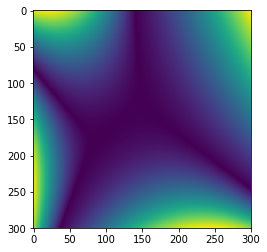

In [34]:

plt.imshow(fill_img(voronoi, size))